In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import random
import warnings

pd.set_option('display.max_colwidth',200)
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Womens_Clothing_E-Commerce_ Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [4]:
data.shape

(23486, 11)

In [6]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
data.dropna(axis=0,inplace=True)

In [8]:
data.shape

(19662, 11)

In [9]:
# define a dictionary of all possible contractions and their expanded forms
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [10]:
def text_cleaner(text):
    newString=text.lower()
    newString=' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split()])
    newString = re.sub(r"’s\b","",newString)
    newString = re.sub("[^a-zA-Z.,]", " ", newString)
      
    long_tokens=[]
    
    for i in newString.split():
        if(len(i) > 1):
            long_tokens.append(i)
    return " ".join(long_tokens)

In [13]:
cleaned_text=[]
reviews=np.array(data['Review Text'])
for i in range(len(reviews)):
    cleaned_text.append(text_cleaner(reviews[i]))
cleaned_summary=[]
summary=np.array(data['Title'])
for i in range(len(summary)):
    cleaned_summary.append(text_cleaner(summary[i]))
df=pd.DataFrame({'text':cleaned_text,'summary':cleaned_summary,'reviews':reviews})    

In [14]:
df.head()

,text,summary,reviews
0,had such high hopes for this dress and really wanted it to work for me. initially ordered the petite small my usual size but found this to be outrageously small. so small in fact that could not zi...,some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...
1,"love, love, love this jumpsuit. it is fun, flirty, and fabulous every time wear it, get nothing but great compliments",my favorite buy,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"
2,this shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt,flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!
3,"love tracy reese dresses, but this one is not for the very petite. am just under feet tall and usually wear in this brand. this dress was very pretty out of the package but its lot of dress. the s...",not for the very petite,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of..."
4,"aded this in my basket at hte last mintue to see what it would look like in person. store pick up went with teh darkler color only because am so pale hte color is really gorgeous, and turns out it...",cagrcoal shimmer fun,"I aded this in my basket at hte last mintue to see what it would look like in person. (store pick up). i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and..."


In [17]:
text_word_count=[]
summary_word_count=[]
for i in range(len(df)):
    text_word_count.append(len(df['text'][i].split()))
for i in range(len(df)):
    summary_word_count.append(len(df['summary'][i].split()))

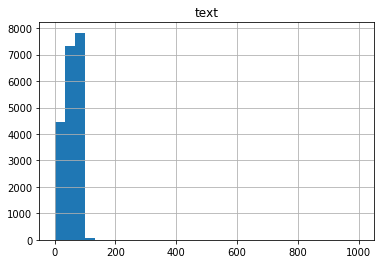

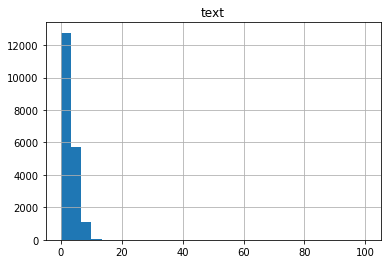

In [19]:
text_lenght_df=pd.DataFrame({'text':text_word_count})
text_lenght_df.hist(bins=30,range=(0,1000))

summary_lenght_df=pd.DataFrame({'text':summary_word_count})
summary_lenght_df.hist(bins=30,range=(0,100))
plt.show()

In [20]:
max_text_len=50
max_sum_len=7

In [21]:
df['summary']=df['summary'].apply(lambda x:'sostok'+x+'eostok')

In [22]:
df.shape

(19662, 3)

In [23]:
from sklearn.model_selection import train_test_split

#split the cleaned data
x_tr, x_val, y_tr, y_val = train_test_split( df['text'],df['summary'],test_size = 0.1, random_state=0,shuffle=True)

#split the uncleaned data into same ratio with same random state
text_tr, text_val, y_tr, y_val = train_test_split( df['reviews'],df['summary'],test_size = 0.1, random_state=0,shuffle=True)

In [24]:
x_tr.shape

(17695,)

In [25]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

x_tokenizer = Tokenizer(num_words=5000) 
x_tokenizer.fit_on_texts(list(x_tr))

Using TensorFlow backend.


In [26]:
#convert text sequences into integer sequences
x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr   =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
x_val  =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')

#size of vocabulary
x_voc   =  x_tokenizer.num_words + 1

In [27]:
y_tokenizer = Tokenizer(num_words = 3000)   
y_tokenizer.fit_on_texts(list(y_tr))

In [28]:
summary_val = np.array(y_val)
text_val = np.array(text_val)

In [29]:
# Convert word sequences to integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val) 

In [30]:
# eliminate the sequences from training data
index=[]
for i in range(len(y_tr_seq)):
    if(len(y_tr_seq[i])<=3):
        index.append(i)
        
y_tr_seq = np.delete(y_tr_seq,index, axis=0)
x_tr = np.delete(x_tr,index, axis=0)

# eliminate the sequences from test data
index = []
for i in range(len(y_val_seq)):
    if(len(y_val_seq[i])<=3):
        index.append(i)
        
y_val_seq = np.delete(y_val_seq,index, axis=0)
x_val = np.delete(x_val,index, axis=0)
text_val = np.delete(text_val,index,axis=0)
summary_val = np.delete(summary_val,index,axis=0)

In [32]:
#padding zero upto maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_sum_len, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_sum_len, padding='post')

#size of vocabulary
y_voc = y_tokenizer.num_words +1